checking for rough consistency with fig.11 of 2103.01964

In [1]:
from LIMxCMBL.init import *


In [2]:
kmin, kmax, nk = 1e-4, 1e2, 128
k = np.logspace(np.log10(kmin), np.log10(kmax), nk)
pk_lin = ccl.linear_matter_power(cosmo, k, 1)

In [3]:
import matplotlib.pyplot as plt

In [4]:
from LIMxCMBL.kernels import *
from LIMxCMBL.experiments import *

# CCAT Prime

In [5]:
zmin = 3.5
zmax = 8.1
idxs = np.where((zs < zmax) & (zs>zmin))[0]

In [6]:
_a, _b = CCAT_prime_Pei() #[(kJy/sr)^2 Mpc^3]

_a = _a.to((u.Jy/u.sr)**2 * u.Mpc**3) * h**3 #[(Jy/sr)^2 Mpc/h^3]
_b = _b.to((u.Jy/u.sr)**2 * u.Mpc**3) * h**3 #[(Jy/sr)^2 Mpc/h^3]

Text(0.5, 1.0, 'CII')

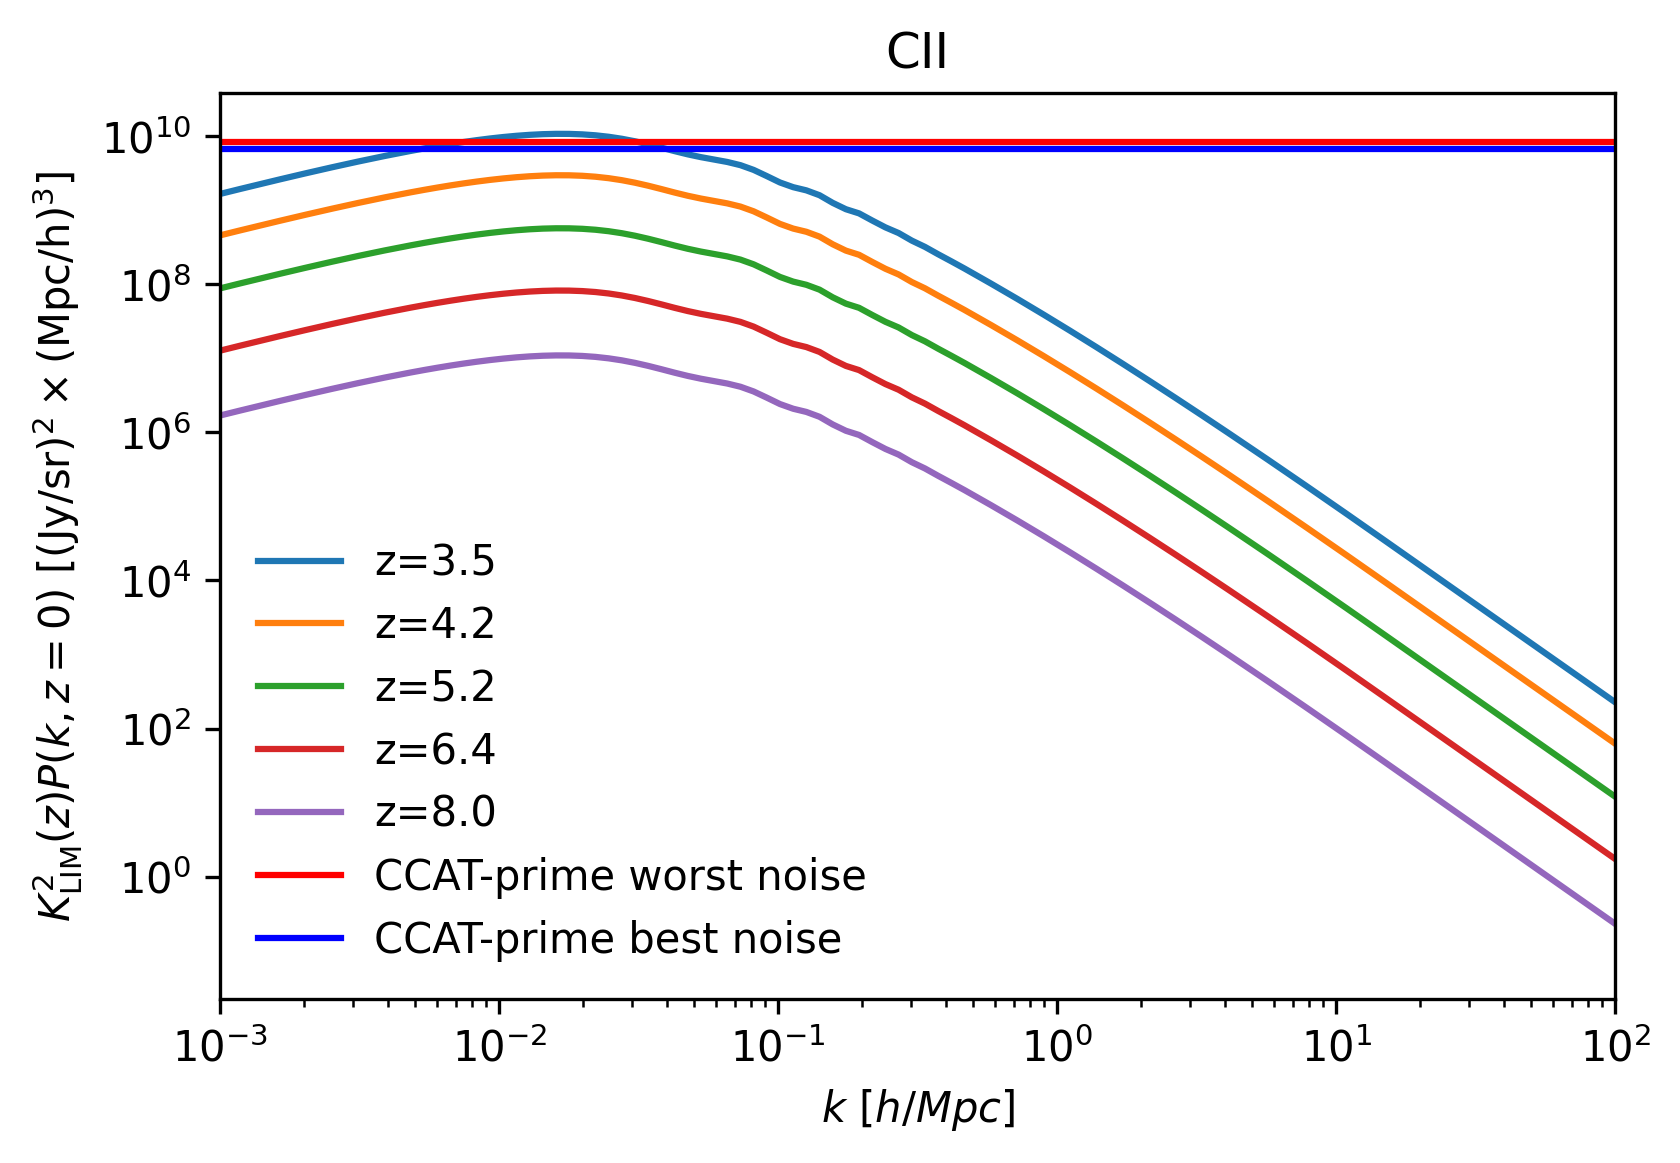

In [7]:
plt.figure(dpi = 300, facecolor='w')

for idx in idxs[::500]:
    z = zs[idx]
    plt.plot(k/h, (KI[idx].to(u.Jy/u.sr))**2 * pk_lin * h **3, label='z=%.1f'%(z))
    
    
plt.axhline(np.array(_a), c='r', label='CCAT-prime worst noise')
plt.axhline(np.array(_b), c='b', label='CCAT-prime best noise')

plt.xlim(1e-3, 1e2)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('$k\ [h / Mpc]$', )
plt.ylabel(r'$K_{\rm LIM}^2(z)P(k, z=0)\ [{\rm (Jy/sr)^2\times (Mpc/h)}^3]$', )
plt.legend(frameon=False)
plt.title('CII')

# COMAP

adapted from https://github.com/EmmanuelSchaan/HaloGen/blob/LIM/lim_specs.py

In [8]:
zmin = 2.4
zmax = 3.4
idxs = np.where((zs < zmax) & (zs>zmin))[0]

In [9]:
_a, _b = COMAP_Pei()

_a = _a.to((u.Jy/u.sr)**2 * u.Mpc**3) * h**3 #[(Jy/sr)^2 Mpc/h^3]
_b = _b.to((u.Jy/u.sr)**2 * u.Mpc**3) * h**3 #[(Jy/sr)^2 Mpc/h^3]

Text(0.5, 1.0, 'CO(1-0)')

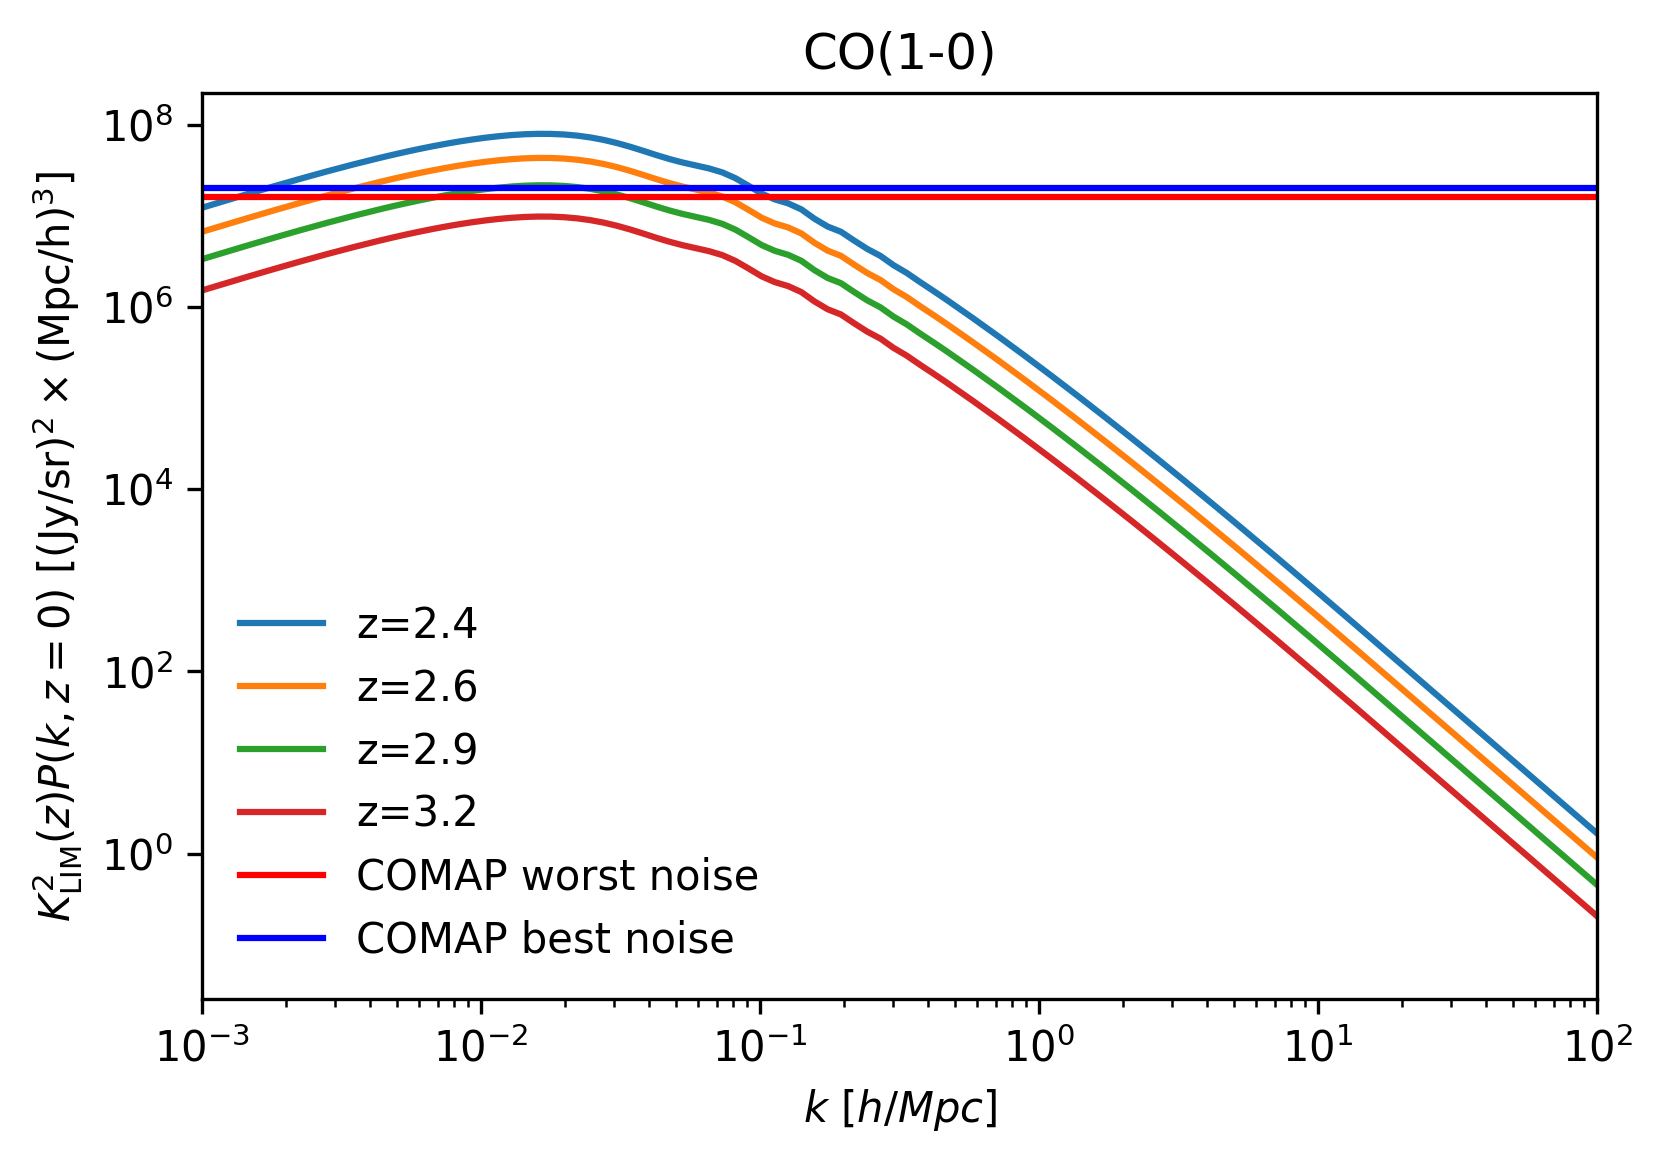

In [10]:
plt.figure(dpi = 300, facecolor='w')

for idx in idxs[::250]:
    z = zs[idx]
    plt.plot(k/h, (KI_CO[idx].to(u.Jy/u.sr))**2 * pk_lin * h **3, label='z=%.1f'%(z))
    
    
plt.axhline(np.array(_a), c='r', label='COMAP worst noise')
plt.axhline(np.array(_b), c='b', label='COMAP best noise')

plt.xlim(1e-3, 1e2)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('$k\ [h / Mpc]$', )
plt.ylabel(r'$K_{\rm LIM}^2(z)P(k, z=0)\ [{\rm (Jy/sr)^2\times (Mpc/h)}^3]$', )
plt.legend(frameon=False)
plt.title('CO(1-0)')

# SPHEREx and HETDEX

In [11]:
zmin = 1.9
zmax = 9
idxs = np.where((zs < zmax) & (zs>zmin))[0]

In [12]:
#1412.4872
#2103.01971

In [13]:
R = 150
Omegapix = (6*u.arcsec)**2
Omegasurv = 2 * 100 * u.deg**2

In [14]:
#also taken from Manu's code
# Inferred from SPHEREx science book
mAB5Sigma = 22 # 5sigma lim mag for point source (Cheng+18)

f5Sigma = 10.**((8.9-mAB5Sigma)/2.5) * u.Jy   # 5sigma lim point source flux [Jy]
sigmaFSource = f5Sigma / 5. # 1sigma lim point source flux [Jy]

# This point source flux is the output of a spatial matched filter
# for one frequency element.
# It needs to be converted to pixel flux.
# The SPHEREx doc, fig 9, gives the conversion using 
# the effective number of pixels covered by the PSF
nPixEff = 3.   # 2-5 in fig 9 of SPHEREx doc

sigmaFPixel = sigmaFSource / np.sqrt(nPixEff)
sigmaIPixel = sigmaFPixel / Omegapix  

# convert from pixel variance
# to white noise power spectrum
result = sigmaIPixel**2 * voxelComovingVolume(9, Omegapix, R=R)
result = result.to((u.Jy/u.sr)**2 * u.Mpc**3) * h**3 #[(Jy/sr)^2 Mpc/h^3]

Text(0.5, 1.0, 'Ly$\\alpha$')

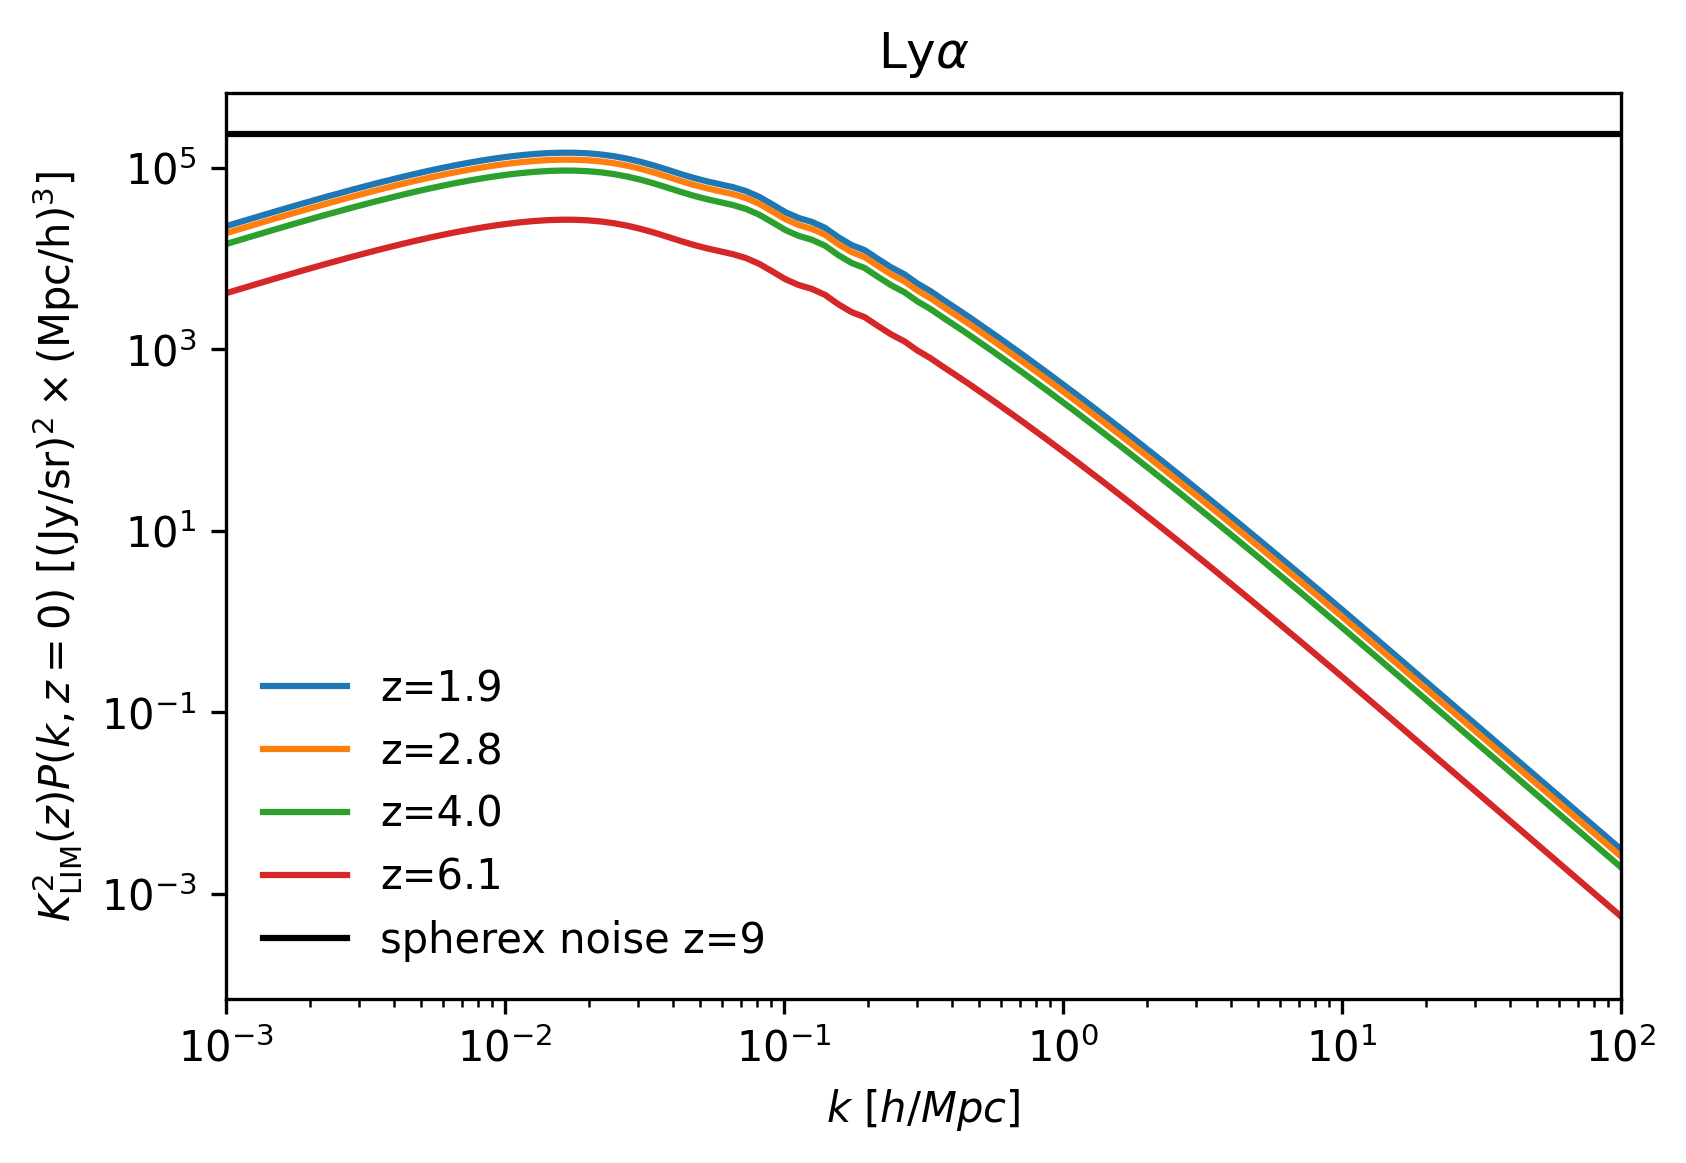

In [15]:
plt.figure(dpi = 300, facecolor='w')

for idx in idxs[::1000]:
    z = zs[idx]
    plt.plot(k/h, (KI_Lya[idx].to(u.Jy/u.sr))**2 * pk_lin * h **3, label='z=%.1f'%(z))
    
    
plt.axhline(np.array(result), c='k', label='spherex noise z=9')

plt.xlim(1e-3, 1e2)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('$k\ [h / Mpc]$', )
plt.ylabel(r'$K_{\rm LIM}^2(z)P(k, z=0)\ [{\rm (Jy/sr)^2\times (Mpc/h)}^3]$', )
plt.legend(frameon=False)
plt.title(r'Ly$\alpha$')
